# Tutorial about clustering localizations data

Locan provides methods for clustering localizations in LocData objects. The methods all return a new LocDat object that represents the collected selections for each cluster.

In [1]:
from pathlib import Path

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import locan as lc

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
lc.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.15.dev62+gc0d4edf

Python:
   version: 3.10.12


## Synthetic data

We simulate localization data that follows a Neyman-Scott distribution in 2D:

In [3]:
rng = np.random.default_rng(seed=11)

In [ ]:
locdata = lc.simulate_Thomas(parent_intensity=1e-5, region=((0, 1000), (0, 1000)), cluster_mu=1000, cluster_std=10, seed=rng)

locdata.print_summary()

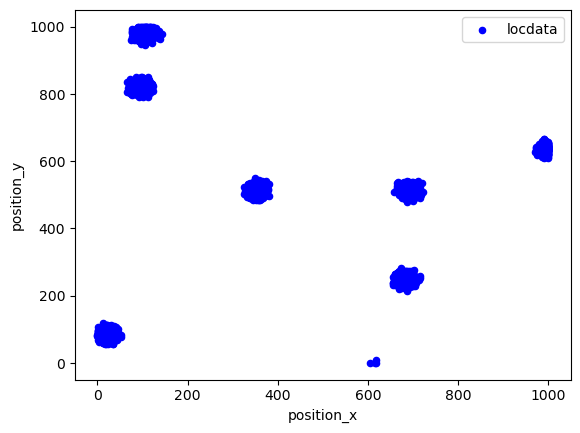

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

## Cluster localizations by dbscan

In [6]:
noise, clust = lc.cluster_dbscan(locdata, eps=20, min_samples=3)
assert noise.data.empty

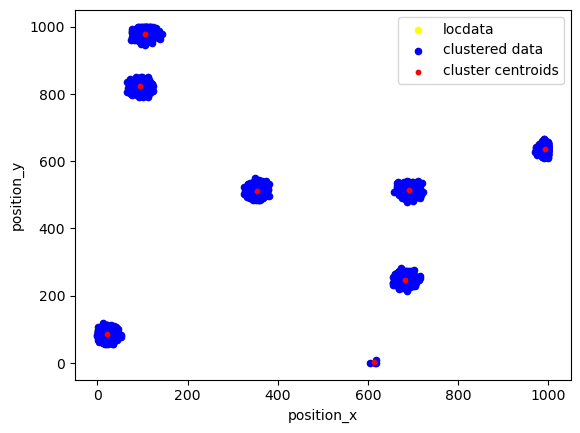

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata')
lc.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data')
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=10, label='cluster centroids')
plt.show()

In [8]:
clust.data.head()

,localization_count,position_x,uncertainty_x,position_y,uncertainty_y,region_measure_bb,localization_density_bb,subregion_measure_bb,region_measure,localization_density,subregion_measure
0,1016,20.379759,0.300643,85.374381,0.314089,3262.794976,0.311389,229.091796,1000000,0.001016,4000
1,1050,681.909709,0.305784,248.276785,0.310572,4122.205751,0.254718,257.346576,1000000,0.001050,4000
2,986,353.614004,0.302981,512.621728,0.320747,3814.439353,0.258491,248.125971,1000000,0.000986,4000
3,996,690.951712,0.315008,513.619337,0.313548,3935.485208,0.253082,250.933843,1000000,0.000996,4000
4,368,992.523811,0.288485,636.239028,0.548494,1650.773324,0.222926,170.375014,1000000,0.000368,4000


## Cluster localizations in the presence of noise

Often homogeneously distributed localizations are present that cannot be clustered (so-called noise). In this case *noise* should be set True such that two LocData objects are returned that hold noise and the cluster collection. If *noise* is False it will be part of the returned cluster collection.

In [9]:
locdata_cluster = lc.simulate_Thomas(parent_intensity=1e-5, region=((0, 1000), (0, 1000)), cluster_mu=1000, cluster_std=10, seed=rng)
locdata_noise = lc.simulate_Poisson(intensity=1e-4, region=((0, 1000), (0, 1000)), seed=rng)
locdata = lc.LocData.concat([locdata_cluster, locdata_noise])

In [10]:
noise, clust = lc.cluster_dbscan(locdata, eps=30, min_samples=3)

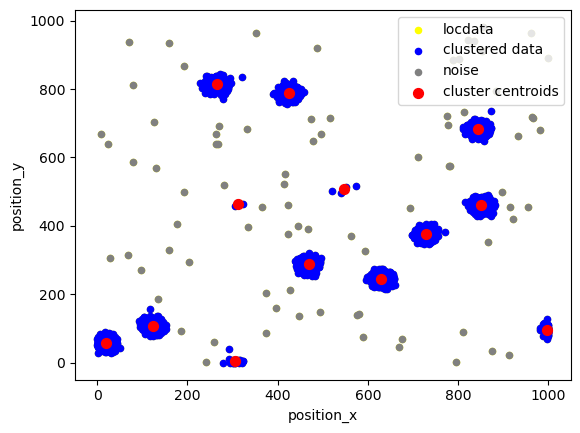

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata')
lc.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data')
noise.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Gray', label='noise')
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=50, label='cluster centroids')
plt.show()

If single localizations should be inlcuded as individual clusters, we need to reduce `min_samples` to 1. In that case `noise` will always be None.

In [12]:
noise, clust = lc.cluster_dbscan(locdata, eps=20, min_samples=1)
assert noise.data.empty

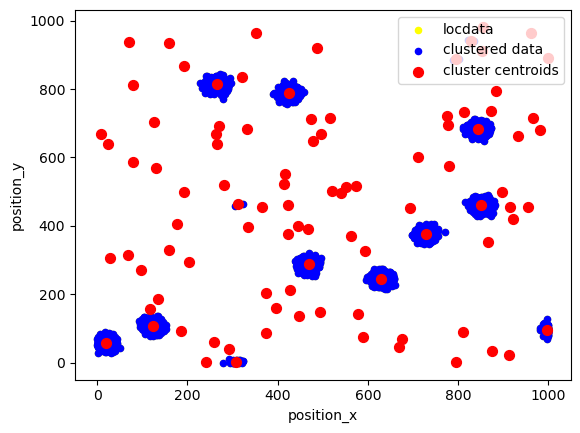

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata')
lc.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data')
# noise.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Gray', label='noise')
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=50, label='cluster centroids')
plt.show()

Other cluster functions are available in the `locan.data.cluster`module.